In [2]:
import os
import json
import statistics
import matplotlib.pyplot as plt

In [110]:
model_name = 'ant'
policy = 'dmap-icl'
sigma_train = '01'
sigmas_test = ['01']
seed = 2

In [121]:
PATH = f'./data/{model_name}/performance'
files = [
    filename for filename in os.listdir(PATH) if 'results' in filename
]
files_icl = [filename for filename in files if 'dmap-icl' in filename]
icl_results = {}

for filename in files_icl:
    with open(os.path.join(PATH, filename), 'r') as json_file:
        json_res = json.load(json_file)
        steps = int(filename.split('_')[-1].split('.')[0])
        icl_results[steps] = {}
        for sigma_test in sigmas_test:
            icl_results[steps][sigma_test] = json_res[f'{model_name}_{policy}_sigma_{sigma_train}_seed_{seed}']['results'][f'test_sigma_between_0_{sigma_test}']

icl_results = dict(sorted(icl_results.items()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 100, 500, 1000, 2000, 5000, 10000, 50000, 100000]
{'01': [831.4072026570758, 1507.445499245282, 1118.4901061509684, 1530.5099198536175, 1408.0324449260984, 1653.4176907936226, 1658.6838594230155, 2014.2558353771026, 1978.988179845394, 2096.276763921111, 2211.455265700906, 2223.8374112517295, 2187.4166569282443, 2224.004205677437, 2187.199895013816, 2184.554766488111, 2173.1541399122048, 2205.728621029287, 2200.892061599837, 2225.505772255767, 2211.7076869362677, 2158.9069444577867, 2159.6247029107085, 2188.992578163587, 2136.9865001441362, 2161.1032957159077, 2141.3675884969934, 2211.1127997982503, 2195.354153186895, 2178.520168309315, 2147.0139802868925, 2163.5012018173443, 2243.3015113050565, 2205.282182962343, 2178.3803307679236, 2188.6196715281217, 2237.76682742149, 2245.8919834258554, 2184.556507051626, 2197.083656759822, 

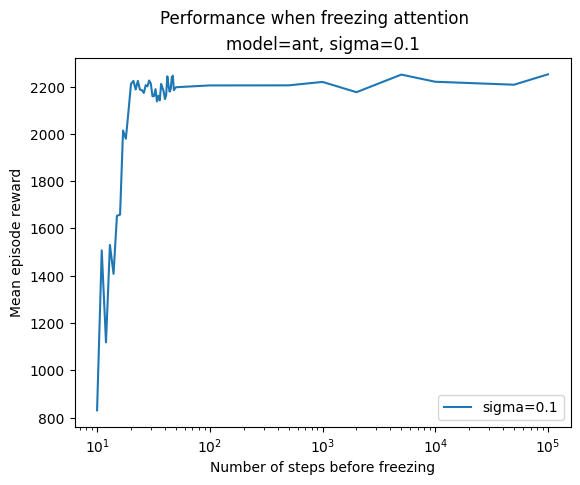

In [122]:
x = []
mean = {}

for key in icl_results.keys():
    x.append(key)
for sigma in sigmas_test:
    mean[sigma] = []
    for key in icl_results.keys():
        mean[sigma].append(statistics.mean(icl_results[key][sigma]))

print(x)
print(mean)
plt.xscale('log')
plt.xlabel('Number of steps before freezing')
plt.ylabel('Mean episode reward')
for sigma in mean.keys():
    plt.plot(x, mean[sigma], '-', label=f'sigma={sigma_train[0]}.{sigma_train[1]}')
    # plt.plot(x, mean[sigma], 'o')
plt.title(f'model={model_name}, sigma={sigma_train[0]}.{sigma_train[1]}')
plt.suptitle('Performance when freezing attention')
plt.legend()